In [2]:
!pip install --upgrade mxnet gluoncv

     |████████████████████████████████| 68.7MB 66kB/s 
     |████████████████████████████████| 757kB 41.3MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv as gcv
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
import numpy as np

In [5]:
net = gcv.model_zoo.get_model('yolo3_darknet53_coco',pretrained=True)

100%|██████████| 224190/224190 [00:04<00:00, 53671.61KB/s]


In [0]:
class absenMahasiswa():
  def __init__(self,threshold,net):
    self.network =  net
    self.threshold = threshold

  def visualisasi(self,gambar,label,skor,bb):
    ax = utils.viz.plot_bbox(gambar,
                             bb[0],
                             skor[0],
                             label[0],
                             class_names=self.network.classes)
    fig = plt.gcf()
    fig.set_size_inches(14,14)
    plt.show()

  def hitungMahasiswa(self,filepath,visualize=False):
    gambar = image.imread(filepath)
    gambar = gcv.data.transforms.presets.yolo.transform_test(gambar)
    prediksi = self.network(gambar[0])
    label,skor,boundingBox = prediksi
    idx = np.where(skor.asnumpy()>=self.threshold) and np.where(label.asnumpy()==0)
    label = label[:,idx[1]]
    skor = skor[:,idx[1]]
    boundingBox = boundingBox[:,idx[1]]
    if visualize:
      self.visualisasi(gambar[1],label,skor,boundingBox)
    skor = skor.asnumpy()
    # skor = np.transpose(skor)
    skor = skor[0]
    skor = skor[skor>=self.threshold]
    k = len(skor)
    if k > 0:
      jumlahSiswa = label[0,:k]
      jumlahSiswa = jumlahSiswa.asnumpy()
      jumlahSiswa = np.transpose(jumlahSiswa)
      jumlahSiswa = jumlahSiswa[0].astype(int)
      jumlahSiswa = np.sum(jumlahSiswa==0)
      print("Jumlah siswa yang hadir di kelas = {} orang".format(jumlahSiswa))
    else:
      print("tidak ada siswa di kelas")
    


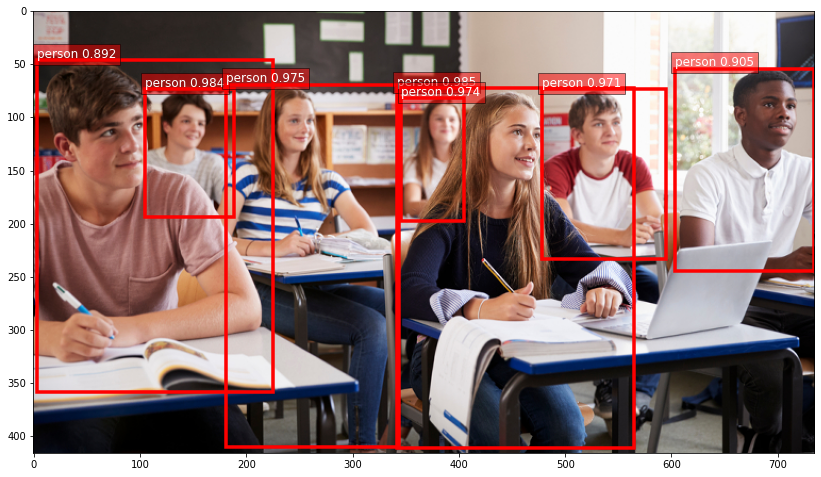

Jumlah siswa yang hadir di kelas = 7 orang


In [121]:
hitung = absenMahasiswa(0.75,net)
hitung.hitungMahasiswa('student1.jpg',visualize=True)